In [232]:
# Импорт библиотек:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os
import functools
%matplotlib inline

In [233]:
# Загрузка данных
superstore_df = pd.read_csv('../mini_project_superstore/superstore.csv', parse_dates=['Order Date', 'Ship Date'], sep=',')

In [234]:
# Просмотр типов данных
superstore_df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

In [235]:
# Замена наименований и регистра столбцов:
superstore_df.columns = [i.replace(' ', '_') for i in superstore_df]
superstore_df.columns = [i.lower() for i in superstore_df]

In [236]:
# Исследование данных:
superstore_df.describe()

,row_id,postal_code,sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [237]:
# Удаление ненужных столбцов:
superstore_df = superstore_df.drop(columns=['row_id'])

In [238]:
# Исследование данных:
superstore_df.shape

(9800, 17)

In [239]:
# Поиск дубликатов:
superstore_df[superstore_df.duplicated()]

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales
3406,US-2015-150119,2015-04-23,2015-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229.0,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372


In [240]:
# Удаление дубликатов:
superstore_df.drop_duplicates()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [241]:
# Поиск пропущенных значений:
superstore_df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_id       0
customer_name     0
segment           0
country           0
city              0
state             0
postal_code      11
region            0
product_id        0
category          0
sub-category      0
product_name      0
sales             0
dtype: int64

In [242]:
# Просмотр данных с пропущенными значениями:
superstore_df[superstore_df['postal_code'].isnull()]

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales
2234,CA-2018-104066,2018-05-12,2018-10-12,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,CA-2016-162887,2016-07-11,2016-09-11,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,US-2017-150140,2017-06-04,2017-10-04,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [243]:
# Запись в почтовый код "0":
superstore_df['postal_code'] = superstore_df['postal_code'].fillna('0')

In [244]:
# Поиск пропущенных значений:
superstore_df.isnull().sum()

order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub-category     0
product_name     0
sales            0
dtype: int64

In [245]:
# Добавление новых столбцов год, месяц для заказа и поставки:
superstore_df.insert(2,'year_order', superstore_df['order_date'].dt.year)
superstore_df.insert(3,'month_order', superstore_df['order_date'].dt.month)
superstore_df.insert(5,'year_ship', superstore_df['ship_date'].dt.year)
superstore_df.insert(6,'month_ship', superstore_df['ship_date'].dt.month)

In [246]:
# Сумма продаж по годам:
superstore_df.groupby(['year_order'], as_index=False) \
    .agg({'sales': 'sum'}) \
    .sort_values('sales', ascending=False) \
    .round(2)

,year_order,sales
3,2018,722052.02
2,2017,600192.55
0,2015,479856.21
1,2016,459436.01


In [247]:
# Сумма продаж по категориям и подкатегориям:
superstore_df.groupby(['category', 'sub-category'], as_index=False) \
    .agg({'sales': 'sum'}) \
    .sort_values('sales', ascending=False) \
    .round(2)

,category,sub-category,sales
16,Technology,Phones,327782.45
1,Furniture,Chairs,322822.73
11,Office Supplies,Storage,219343.39
3,Furniture,Tables,202810.63
6,Office Supplies,Binders,200028.79
15,Technology,Machines,189238.63
13,Technology,Accessories,164186.70
14,Technology,Copiers,146248.09
0,Furniture,Bookcases,113813.20
4,Office Supplies,Appliances,104618.40


In [248]:
# Сумма продаж по регионам:
superstore_df.groupby(['region'], as_index=False) \
    .agg({'sales': 'sum'}) \
    .sort_values('sales', ascending=False) \
    .round(2)

,region,sales
3,West,710219.68
1,East,669518.73
0,Central,492646.91
2,South,389151.46


In [249]:
# Сумма продаж по штатам (топ-10):
superstore_df.groupby(['state'], as_index=False) \
    .agg({'sales': 'sum'}) \
    .sort_values('sales', ascending=False) \
    .round(2) \
    .head(10)

,state,sales
3,California,446306.46
30,New York,306361.15
41,Texas,168572.53
45,Washington,135206.85
36,Pennsylvania,116276.65
8,Florida,88436.53
11,Illinois,79236.52
20,Michigan,76136.07
33,Ohio,75130.35
44,Virginia,70636.72


In [250]:
# Сумма продаж сегментам:
superstore_df.groupby(['segment'], as_index=False) \
    .agg({'sales': 'sum'}) \
    .sort_values('sales', ascending=False)

,segment,sales
0,Consumer,1.148061e+06
1,Corporate,6.884941e+05
2,Home Office,4.249822e+05


In [251]:
# Количество доставок по категориям:
superstore_df.groupby(['ship_mode'], as_index=False) \
    .agg({'order_id': 'count'}) \
    .rename(columns={'order_id': 'count_ship'}) \
    .sort_values('count_ship',ascending=False)

,ship_mode,count_ship
3,Standard Class,5859
2,Second Class,1902
0,First Class,1501
1,Same Day,538


In [252]:
# Процентное соотношение доставок по категориям:
superstore_df.ship_mode.value_counts(normalize=True, dropna=True).mul(100).round(2)

Standard Class    59.79
Second Class      19.41
First Class       15.32
Same Day           5.49
Name: ship_mode, dtype: float64

In [253]:
# Количество дней обработки заказов:
superstore_df['order_preparation_days'] = (superstore_df['ship_date'] - superstore_df['order_date']) / np.timedelta64 ( 1 , 'D')

In [254]:
# Запишем в новую переменную данные, исключив невалидные данные по обработке заказа (дата отправки меньше, чем дата заказа)
superstore_prep_valid = superstore_df[(superstore_df['order_preparation_days'] > 0)]
superstore_prep_valid[:3]

,order_id,order_date,year_order,month_order,ship_date,year_ship,month_ship,ship_mode,customer_id,customer_name,...,city,state,postal_code,region,product_id,category,sub-category,product_name,sales,order_preparation_days
0,CA-2017-152156,2017-08-11,2017,8,2017-11-11,2017,11,Second Class,CG-12520,Claire Gute,...,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,92.0
1,CA-2017-152156,2017-08-11,2017,8,2017-11-11,2017,11,Second Class,CG-12520,Claire Gute,...,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,92.0
12,CA-2018-114412,2018-04-15,2018,4,2018-04-20,2018,4,Standard Class,AA-10480,Andrew Allen,...,Concord,North Carolina,28027.0,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,5.0


In [255]:
# Среднее количество дней обработки заказов по видам доставки:
superstore_prep_valid.groupby(['ship_mode'], as_index=False) \
    .agg({'order_preparation_days': 'mean'}) \
    .rename(columns={'order_preparation_days': 'average_preparation_days'}) \
    .sort_values('average_preparation_days', ascending=False) \
    .round(2)

,ship_mode,average_preparation_days
3,Standard Class,52.81
2,Second Class,36.22
0,First Class,26.31
1,Same Day,21.73


In [256]:
# Среднее количество дней обработки заказов по штатам:
superstore_prep_valid.groupby(['state'], as_index=False) \
    .agg({'order_preparation_days': 'mean'}) \
    .rename(columns={'order_preparation_days': 'average_preparation_days'}) \
    .sort_values('average_preparation_days', ascending=False) \
    .round(2) \
    .head(10)

,state,average_preparation_days
48,Wyoming,153.00
7,District of Columbia,153.00
13,Iowa,72.90
37,Rhode Island,65.66
21,Minnesota,62.79
15,Kentucky,60.80
12,Indiana,57.60
31,North Carolina,57.07
19,Massachusetts,55.81
20,Michigan,51.95


In [257]:
# Среднее количество дней обработки заказов по категориям товаров:
superstore_prep_valid.groupby(['category'], as_index=False) \
    .agg({'order_preparation_days': 'mean'}) \
    .rename(columns={'order_preparation_days': 'average_preparation_days'}) \
    .sort_values('average_preparation_days', ascending=False) \
    .round(2)

,category,average_preparation_days
2,Technology,45.44
1,Office Supplies,44.35
0,Furniture,44.34


In [258]:
superstore_df[:3]

,order_id,order_date,year_order,month_order,ship_date,year_ship,month_ship,ship_mode,customer_id,customer_name,...,city,state,postal_code,region,product_id,category,sub-category,product_name,sales,order_preparation_days
0,CA-2017-152156,2017-08-11,2017,8,2017-11-11,2017,11,Second Class,CG-12520,Claire Gute,...,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,92.0
1,CA-2017-152156,2017-08-11,2017,8,2017-11-11,2017,11,Second Class,CG-12520,Claire Gute,...,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,92.0
2,CA-2017-138688,2017-12-06,2017,12,2017-06-16,2017,6,Second Class,DV-13045,Darrin Van Huff,...,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,-173.0


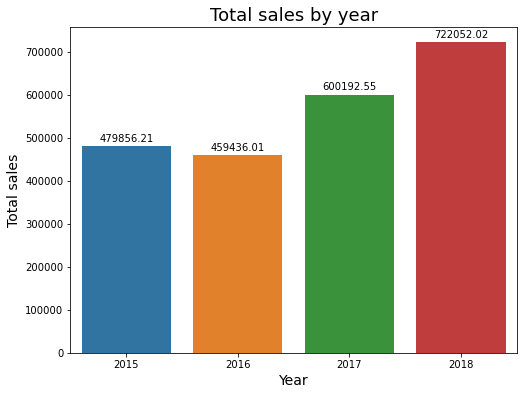

In [259]:
# Итоговая сумма продаж по годам:
superstore_df_vis = superstore_df.groupby('year_order', as_index=False) \
    .agg({'sales': 'sum'}) \
    .rename(columns={'sales': 'total_sales'}) \
    .sort_values('total_sales', ascending=False) \
    .round(2)

plt.figure(figsize=(8,6)) # указываем размер графика
vis = sns.barplot(x='year_order', 
            y='total_sales', 
            data=superstore_df_vis)

for bar in vis.patches:
    vis.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
    
plt.xlabel("Year", size=14)
plt.ylabel("Total sales", size=14)
plt.title("Total sales by year", size=18)
plt.show()

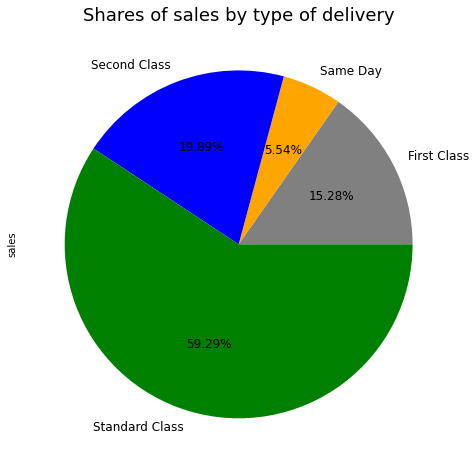

In [260]:
# Доли продаж по видам доставки:
superstore_df.groupby("ship_mode").sales.sum().plot(kind = "pie",
                                        colors = ["grey", "orange", "blue", "green"],
                                        figsize = (8,8),
                                        autopct = "%.2f%%",
                                        fontsize = 12)

plt.title("Shares of sales by type of delivery", size=18)
plt.show()

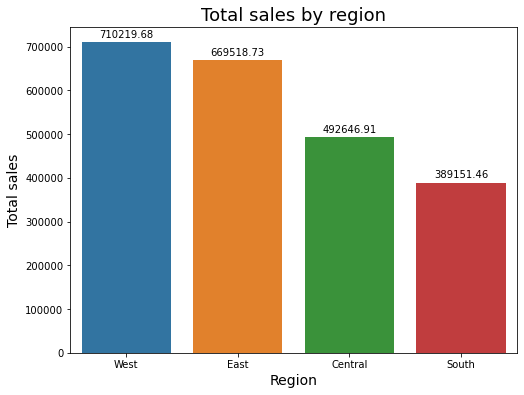

In [261]:
# Итоговая сумма продаж по регионам:
superstore_df_vis = superstore_df.groupby('region', as_index=False) \
    .agg({'sales': 'sum'}) \
    .rename(columns={'sales': 'total_sales'}) \
    .sort_values('total_sales', ascending=False)

plt.figure(figsize=(8,6)) # указываем размер графика
vis = sns.barplot(x='region', 
            y='total_sales', 
            data=superstore_df_vis)

for bar in vis.patches:
    vis.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
    
plt.xlabel("Region", size=14)
plt.ylabel("Total sales", size=14)
plt.title("Total sales by region", size=18)
plt.show()

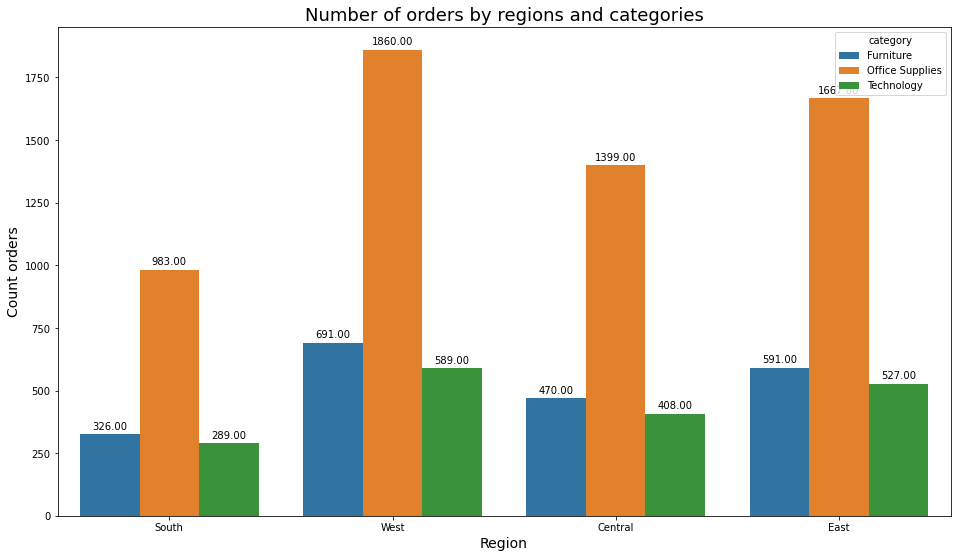

In [262]:
# Количество заказов по регионам и категориям:
plt.figure(figsize=(16,9))
vis_reg_cat = sns.countplot(data=superstore_df, hue='category', x='region') # строим график с нужными параметрами

for bar in vis_reg_cat.patches:
    vis_reg_cat.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
    
plt.xlabel("Region", size=14)
plt.ylabel("Count orders", size=14)
plt.title("Number of orders by regions and categories", size=18)
plt.show()

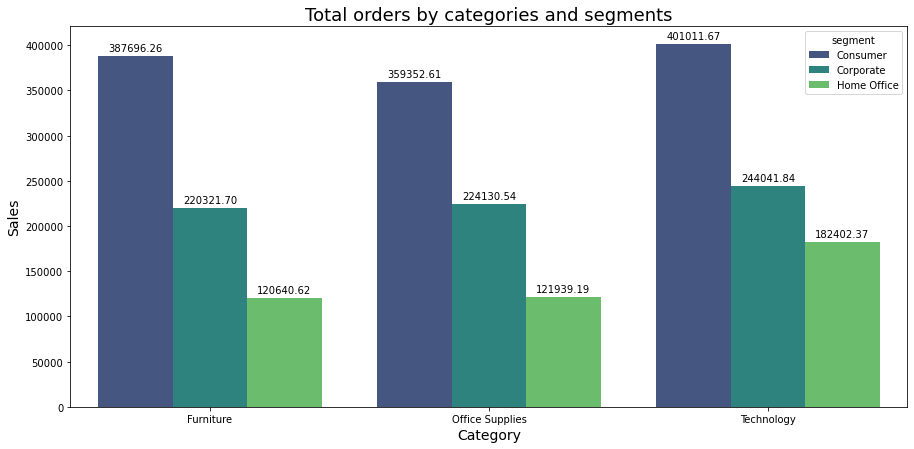

In [263]:
# Сумма заказов по категориям и сегментам:
plt.figure(figsize = (15,7))
ax = sns.barplot(x = superstore_df["category"], 
                 y = superstore_df["sales"], 
                 hue = superstore_df["segment"], 
                 ci = None, estimator=np.sum, 
                 palette="viridis")


for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
    
plt.xlabel("Category", size=14)
plt.ylabel("Sales", size=14)
plt.title("Total orders by categories and segments", size=18)
plt.show()

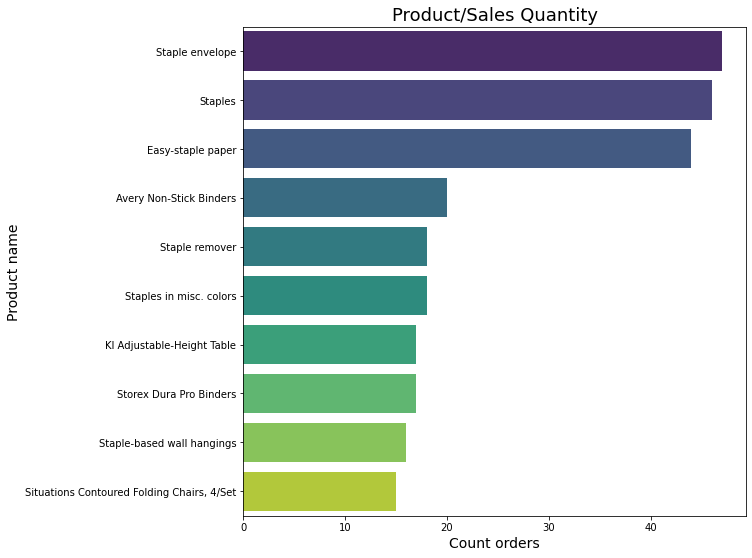

In [264]:
# Количество продаж по продуктам (top-10):
plt.figure(figsize=(9, 9))
Pr_sales = sns.countplot(y = "product_name",data = superstore_df,
                   order = superstore_df["product_name"] \
                   .value_counts().head(10).index, palette="viridis" )

plt.xlabel("Count orders", size=14)
plt.ylabel("Product name", size=14)
plt.title("Product/Sales Quantity", size=18)
plt.show()

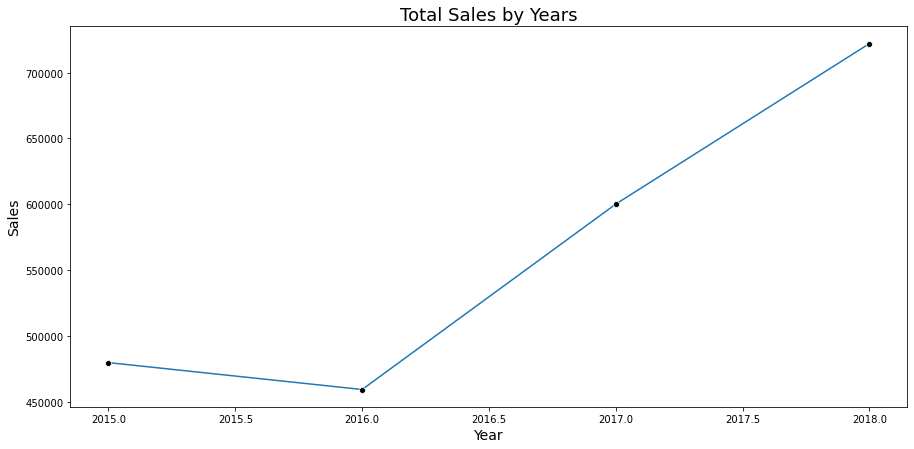

In [265]:
# Общий объем продаж по годам:
total_year_sale = superstore_df.groupby('year_order', as_index=False) \
    .agg({'sales': 'sum'}) \
    .rename(columns={'sales': 'total_sales'}) \
    .sort_values('total_sales', ascending=False)

plt.figure(figsize=(15,7))
sns.lineplot(x = total_year_sale["year_order"],
             y = total_year_sale["total_sales"], ci = None,
             estimator = np.sum,            
             marker = "o", markersize = 6, markerfacecolor = "black")

plt.xlabel("Year", size=14)
plt.ylabel("Sales", size=14)
plt.title("Total Sales by Years",fontsize=18)
plt.show()

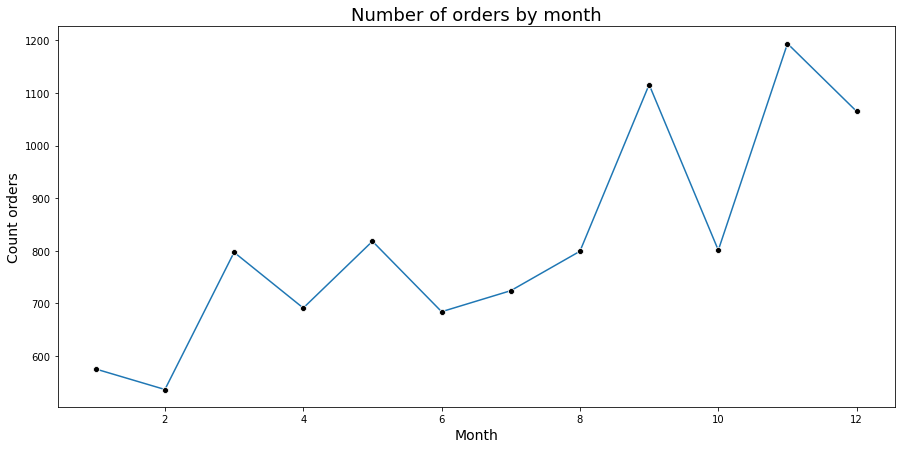

In [266]:
# Количество заказов по месяцам:
count_order_month = superstore_df.groupby('month_order', as_index=False) \
    .agg({'order_id': 'count'}) \
    .rename(columns={'order_id': 'count_orders'}) \
    .sort_values('count_orders', ascending=False)

plt.figure(figsize=(15,7))
sns.lineplot(x = count_order_month["month_order"],
             y = count_order_month["count_orders"], ci = None,
             estimator = np.sum,            
             marker = "o", markersize = 6, markerfacecolor = "black")

plt.xlabel("Month", size=14)
plt.ylabel("Count orders", size=14)
plt.title("Number of orders by month",fontsize=18)
plt.show()

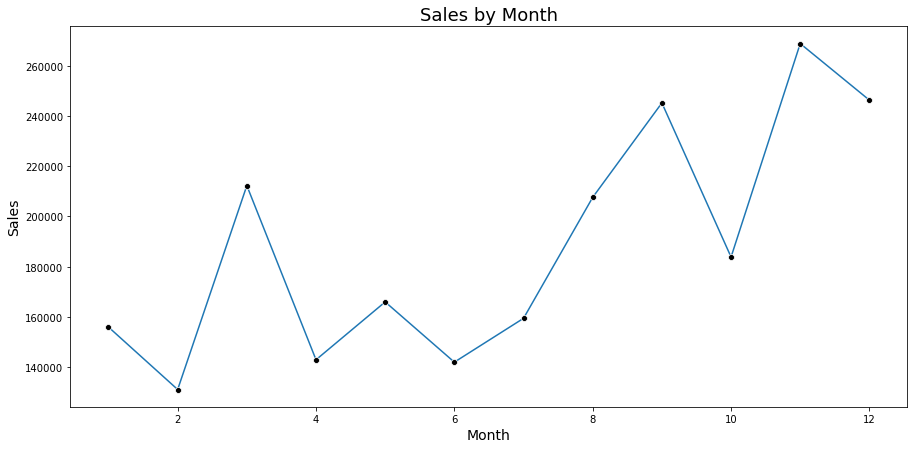

In [267]:
# Продажи по месяцам:
sup_store_month = superstore_df.groupby('month_order', as_index=False) \
    .agg({'sales': 'sum'}) \
    .rename(columns={'sales': 'total_sales'}) \
    .sort_values('total_sales', ascending=False)

plt.figure(figsize=(15,7))
sns.lineplot(x=sup_store_month["month_order"],
             y=sup_store_month["total_sales"],
             estimator=np.mean,
             ci=None,
             marker="o",markersize=6,markerfacecolor="black")

plt.xlabel("Month", size=14)
plt.ylabel("Sales", size=14)
plt.title("Sales by Month",fontsize=18)
plt.show()

In [268]:
# Сохранение данных в csv:
superstore_df.to_csv('superstore_USA.csv', index=False)